(100, 681, 739)


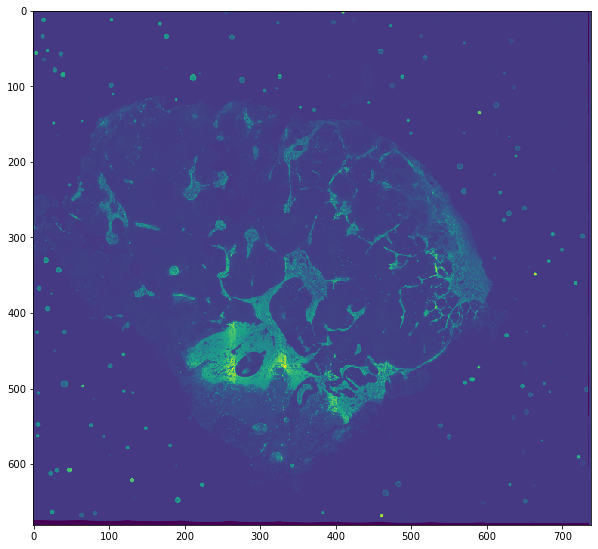

In [2]:
import SimpleITK as sitk
#file_name = "volumes/20200615_PDX_AB580_GFP_100x15um_set1.mha"
file_name = "volumes/20190911_PDX_STG316_gfp_100x15um_15.mha"
#output_file_name = "volumes/20200615_PDX_AB580_GFP_100x15um_set1_corrected6.mha"
output_file_name = "volumes/20190911_PDX_STG316_gfp_100x15um_mean_15.mha"
volume_itk = sitk.ReadImage(file_name, imageIO="MetaImageIO")
volume = sitk.GetArrayFromImage(volume_itk)
print(volume.shape)


from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
plt.imshow(volume[int(volume.shape[0]/2)], interpolation='nearest')
plt.show()

In [6]:
import numpy as np
output_image = np.zeros(volume.shape, dtype=np.float32)

output_image[0, :, :] = volume[0, :, :]

z_size = volume.shape[0]
#for z in range(35, 36):
for z in range(1, z_size):
    #print('{}/{}'.format(z, z_size))
    #output_resolution = 7.5
    #fixed_itk = sitk.GetImageFromArray(volume[z, :, :])
    #moving1_itk = sitk.GetImageFromArray(volume[z+1, :, :])
    #moving2_itk = sitk.GetImageFromArray(volume[z-1, :, :])

    #fixed_itk.SetOrigin((0, 0))
    #fixed_itk.SetSpacing([output_resolution, output_resolution])
    #moving1_itk.SetOrigin((0, 0))
    #moving1_itk.SetSpacing([output_resolution, output_resolution])
    #moving2_itk.SetOrigin((0, 0))
    #moving2_itk.SetSpacing([output_resolution, output_resolution])
    
    
    #matcher = sitk.HistogramMatchingImageFilter()
    #matcher.SetNumberOfHistogramLevels(1024)
    #matcher.SetNumberOfMatchPoints(7)
    #matcher.ThresholdAtMeanIntensityOff()
    #moving1_itk = matcher.Execute(moving1_itk, fixed_itk)
    #moving2_itk = matcher.Execute(moving2_itk, fixed_itk)

    #demons = sitk.FastSymmetricForcesDemonsRegistrationFilter()
    #demons.SetNumberOfIterations(100)
    #demons.SetStandardDeviations(2.0)
    #displacementField1 = demons.Execute(fixed_itk, moving1_itk)
    #displacementField2 = demons.Execute(fixed_itk, moving2_itk)

    # alternative warping
    #warper = sitk.WarpImageFilter()
    #warper.SetOutputParameteresFromImage(fixed_itk)
    #out1_itk = warper.Execute(moving1_itk, displacementField1)
    #out2_itk = warper.Execute(moving2_itk, displacementField2)
    
    fixed = sitk.GetArrayFromImage(fixed_itk)
    #out1 = sitk.GetArrayFromImage(out1_itk)
    #out2 = sitk.GetArrayFromImage(out2_itk)
    #moving1 = sitk.GetArrayFromImage(moving1_itk)
    #moving2 = sitk.GetArrayFromImage(moving2_itk)
    #new = np.maximum(fixed,out)
    #new = np.mean( np.array([ fixed, out1, out2]), axis=0 )
    new = np.mean( np.array([ volume[z, :, :], volume[z-1, :, :]]), axis=0 )
    #new_itk = sitk.GetImageFromArray(new)
    #sitk.WriteImage(out1_itk, "out1.mha")
    #sitk.WriteImage(out2_itk, "out2.mha")
    #sitk.WriteImage(fixed_itk, "fixed.mha")
    #sitk.WriteImage(moving1_itk, "moving1.mha")
    #sitk.WriteImage(moving2_itk, "moving2.mha")
    #sitk.WriteImage(new_itk, "new.mha")
    
    output_image[z, :, :] = new


output_image_itk = sitk.GetImageFromArray(output_image)
output_image_itk.SetOrigin((0, 0, 0))
output_image_itk.SetSpacing(volume_itk.GetSpacing())
sitk.WriteImage(output_image_itk, output_file_name)

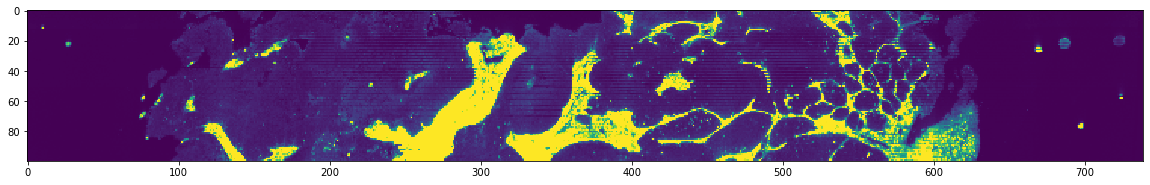

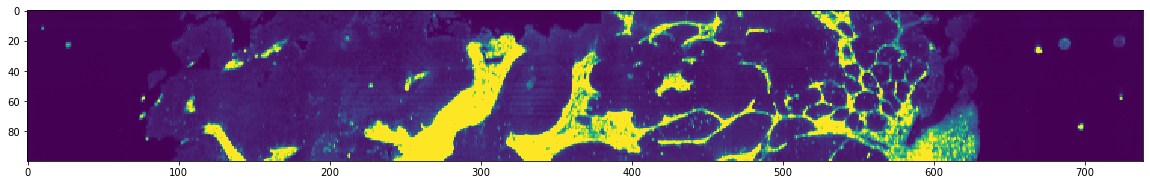

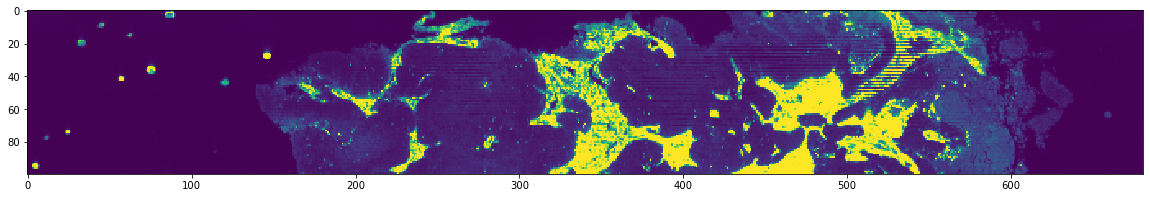

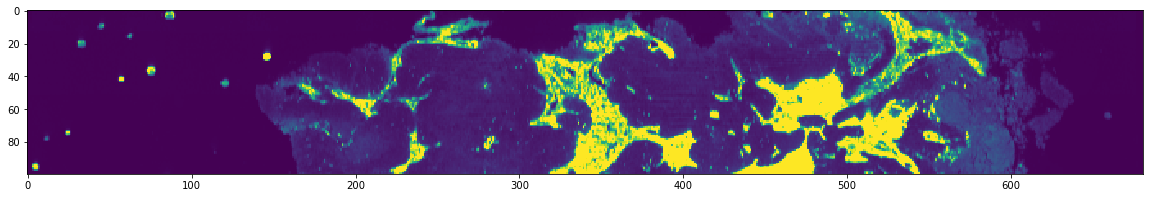

In [9]:
from matplotlib import pyplot as plt 
%matplotlib inline


plt.rcParams["figure.figsize"] = (20, 20) # (w, h)
plt.imshow(volume[:,400,:], interpolation='nearest')
plt.clim(0, 15)
plt.show()
plt.imshow(output_image[:,400,:], interpolation='nearest')
plt.clim(0, 15)
plt.show()
plt.imshow(volume[:,:,350], interpolation='nearest')
plt.clim(0, 15)
plt.show()
plt.imshow(output_image[:,:,350], interpolation='nearest')
plt.clim(0, 15)
#plt.colorbar();
plt.show()